### Data Cleaning

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Loading the data
df=pd.read_csv(r"C:\Users\sarag\Downloads\Case_Study datasets\scores_data.csv")

In [4]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [5]:
df.shape

(149, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [7]:
#Checking the null values
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [8]:
# Printing column names
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [9]:
# Removing spaces of column names
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [11]:
df.dtypes

Batch      object
User_ID    object
Score      object
dtype: object

In [12]:
df['Score'].head()

0    6 / 7
1    6 / 7
2    7 / 7
3    7 / 7
4    4 / 7
Name: Score, dtype: object

In [13]:
# Convert to string
df['Score'] = df['Score'].astype(str).str.strip()

# Extract number before '/'
df['Score'] = df['Score'].str.extract(r'(\d+)')

# Convert to numeric
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [14]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [15]:
df['Score'].head(10)

0    6
1    6
2    7
3    7
4    4
5    7
6    5
7    7
8    3
9    6
Name: Score, dtype: int64

In [16]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [17]:
df = df.dropna(subset=['Score'])

In [18]:
df['Batch'].head(4)

0    AI_ELITE_7
1    AI_ELITE_7
2    AI_ELITE_7
3    AI_ELITE_7
Name: Batch, dtype: object

In [19]:
# checking count of values in Batch column
df['Batch'].value_counts()

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [20]:
df.groupby('Batch')['Score'].agg(['min','max',"mean",'median','std','count'])

,min,max,mean,median,std,count
Batch,,,,,,
AI_ELITE_4,0,7,3.791667,4.0,1.443376,48
AI_ELITE_6,0,7,4.229167,4.0,1.640441,48
AI_ELITE_7,2,7,5.056604,5.0,1.446682,53


In [21]:
df.dtypes

Batch      object
User_ID    object
Score       int64
dtype: object

In [22]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

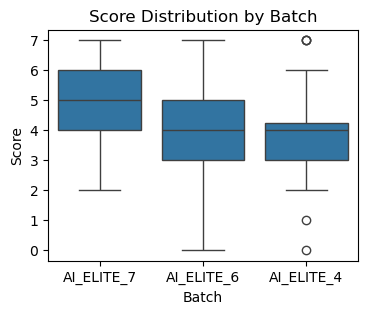

In [23]:
# Boxplot
plt.figure(figsize=(4,3))
sns.boxplot(x='Batch', y='Score', data=df)
plt.title("Score Distribution by Batch")
plt.show()

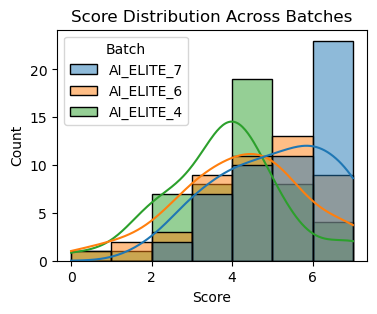

In [24]:
# Histogram with KDE
plt.figure(figsize=(4,3))
sns.histplot(data=df, x='Score', hue='Batch', bins=7, kde=True)
plt.title("Score Distribution Across Batches")
plt.show()


In [25]:
df["Batch"].value_counts()

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

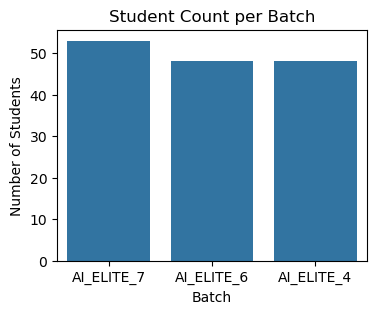

In [26]:
# Count plot
plt.figure(figsize=(4,3))
sns.countplot(x='Batch', data=df)
plt.title("Student Count per Batch")
plt.xlabel("Batch")
plt.ylabel("Number of Students")
plt.show()


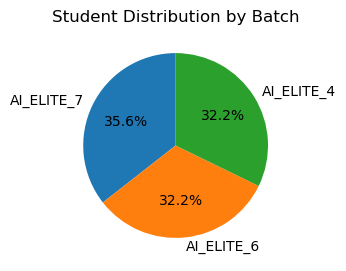

In [27]:
# Pie Chart
batch_counts = df['Batch'].value_counts()
plt.figure(figsize=(4,3))
plt.pie(batch_counts, labels=batch_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Student Distribution by Batch")
plt.show()

### Observations

* The dataset contains 149 student records across three batches with no missing values.
* Scores were successfully cleaned and converted from text format to numeric scale (0–7).
* Student distribution across batches is almost balanced, enabling fair comparison.
* AI_ELITE_7 consistently shows the highest average and median scores.
* AI_ELITE_4 has the lowest overall performance with more low-score cases.
* AI_ELITE_6 exhibits high variability, indicating mixed student performance.
* Score distributions clearly differ across batches, confirming batch-wise performance patterns.
* AI_ELITE_7 has the highest student representation (35.6%), while AI_ELITE_6 and AI_ELITE_4 each contribute 32.2%, indicating nearly balanced batch sizes.

## Model Building

In [31]:
df["Performance"] = df["Score"].apply(lambda x: 1 if x >= 5 else 0)

In [32]:
# Applying encoding for batch column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Batch_encoded"] = le.fit_transform(df["Batch"])

In [33]:
# Selecting target variable and input features
X = df[["Batch_encoded"]]
y = df["Performance"]

In [34]:
# Splitting the data into train,test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [35]:
# Fitting the LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# predicted value
y_pred = lr_model.predict(X_test)

In [37]:
# Checking accuracy_score,Classification Report,Confusion Matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7105263157894737

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76        21
           1       0.71      0.59      0.65        17

    accuracy                           0.71        38
   macro avg       0.71      0.70      0.70        38
weighted avg       0.71      0.71      0.71        38


Confusion Matrix:
 [[17  4]
 [ 7 10]]


### Observations

* The model achieved an accuracy of ~71%, indicating moderate predictive performance.
* Batch information alone provides some predictive power, but it is not sufficient for highly accurate predictions.
* The model performs better at predicting low performers (Class 0) than high performers (Class 1).

### Insights on the Three Batches :

* AI_ELITE_7 shows the highest and most consistent performance, with top average and median scores and fewer low-score cases, indicating a strong learning environment.

* AI_ELITE_6 demonstrates moderate but variable performance, with both high and low scorers, suggesting uneven understanding and the need for selective academic support.

* AI_ELITE_4 has the lowest overall performance, with more low scores and outliers, indicating the need for focused intervention and improvement strategies.

* Overall, AI_ELITE_7 performs best, AI_ELITE_6 shows mixed performance, and AI_ELITE_4 lags behind.